In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
class PCA:
    def __init__(self,n):
        self.new_d = n
    def centrallise_data(self,X):
        r,c = X.shape
        for i in range(c):
            mean = np.mean(X[:,i])
            for j in range(r):
                X[j,i] = X[j,i] - mean
        return X
    def covariance_matrix(self,X):
#         X is a array
        x = np.copy(X)
        r,c = x.shape
#         print(r,c)
        mean = np.mean(x,axis = 0)
#         print(mean)
        for i in range(r):
                x[i,:] = np.subtract(x[i,:],mean)
        cov_mat = np.matmul(x.T,x)/(r-1)
        return cov_mat
    def get_eigen(self,M):
        evalues, evectors = np.linalg.eig(M)
        return evalues,evectors
#     def get_PC(self,X,eigenvector):
# #         shape(X) -> (smaples,d)   shape(eigenvecor) -> (1,d)
#         transpose_eigenvector = np.transpose(eigenvector)
#         pc = np.matmul(X,transpose_eigenvector)
# #         shape(pc) -> (samples,1)
#         return pc
    def sort_eigenvalues(self,evalues,evectors):
#         first we will convert them to list of tuples
        eigen = [(abs(evalues[i]),evectors[:,i]) for i in range(len(evalues))]
        eigen.sort()
        return eigen  # list of  (int,ndarray(3,))
    def TransformData(self,X):
        X = self.centrallise_data(X)
        cov = self.covariance_matrix(X)
#         print(cov)
        evalues,evectors = self.get_eigen(cov)
#         print(evectors)
        eigens = self.sort_eigenvalues(evalues,evectors)
#         print(eigens)
        self.eigen = eigens
        all_pc = [eigens[-1*i][1] for i in range(1,self.new_d+1)]
        all_pc = np.array(all_pc)
#         X . transpose(eigen vector) to get transform data
        transformed_X = np.matmul(X,all_pc.transpose())
        return transformed_X
        
        
        

In [12]:
df = pd.read_csv("anneal.csv",header = None)

df.columns = ["family", "product-type", "steel", "carbon", "hardness", "temper_rolling", "condition", "formability", "strength", "non-ageing", "surface-finish", "surface-quality", "enamelability", "bc", "bf", "bt", "bw/me", "bl", "m" , "chrom", "phos", "cbond", "marvi", "exptl", "ferro", "corr", "blue/bright/varn/clean", "lustre", "jurofm", "s", "p", "shape", "thick", "width", "len", "oil", "bore", "packing", "classes"]
df.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [13]:
df = df.loc[:,["carbon","hardness","strength","thick","width","len","classes"]]
df.head()

,carbon,hardness,strength,thick,width,len,classes
0,8,0,0,0.700,610.0,0,3
1,0,0,0,3.200,610.0,0,3
2,0,0,0,0.700,1300.0,762,3
3,0,60,0,2.801,385.1,0,3
4,0,60,0,0.801,255.0,269,3


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop("classes",axis = 1)
y = df[["classes"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.65,random_state= 12)

In [15]:
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X)
# standardized_X = X.copy()
# standardized_X.iloc[:,:] = sc.transform(standardized_X)
standardized_X = X.copy()
for c in standardized_X.columns:
    standardized_X[c] = (standardized_X[c] - standardized_X[c].mean())/standardized_X[c].std()


# PCA on data without standardized

In [16]:
num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.TransformData(np.array(X))
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])

In [18]:
def explained_variance(eigens):
    sumofEigenValues = 0
    for ind,tup in enumerate(eigens):
        sumofEigenValues += tup[0]
    contribution = [eigens[i][0]/sumofEigenValues for i in range(len(eigens))] 
    return contribution

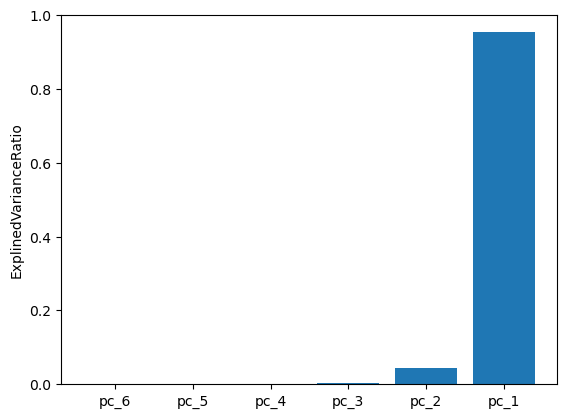

In [19]:
# num col = 6
eigens = ob.eigen
individualExplainedVariance = explained_variance(eigens)
plt.bar(height=individualExplainedVariance,x = ["pc_" + str(6-i) for i in range(6)])
plt.ylabel("ExplinedVarianceRatio")
plt.show()

In [20]:
def cumulativeVariance(expVariance,k):
    return np.sum(expVariance[-1:-k-1:-1])
cumulativeVariance(individualExplainedVariance,10)

1.0

In [21]:
def covariance_matrix(X):
#         X is a array
        x = np.copy(X)
        r,c = x.shape
#         print(r,c)
        mean = np.mean(x,axis = 0)
#         print(mean)
        for i in range(r):
                x[i,:] = np.subtract(x[i,:],mean)
        cov_mat = np.matmul(x.T,x)/(r-1)
        return cov_mat
covariance = covariance_matrix(reduced_X)
print(covariance)
evalue, evector = np.linalg.eig(covariance)
v1,v2 = evector[:,0],evector[:,1]
evalue = np.sqrt(evalue)

[[3.56282349e+06 1.63594932e-11]
 [1.63594932e-11 1.60971346e+05]]


# PCA on standardized data

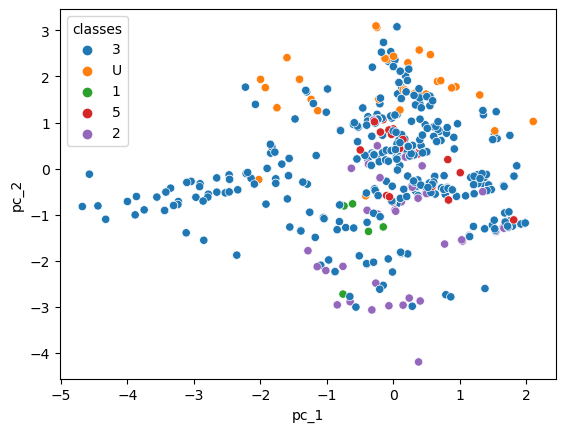

In [22]:
num_principal_components = 2
ob2 = PCA(num_principal_components)
new_data = ob2.TransformData(np.array(standardized_X))
reduced_standardized_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])
sns.scatterplot(x = reduced_standardized_X.iloc[:,0],y = reduced_standardized_X.iloc[:,1],hue = y["classes"])
plt.show()

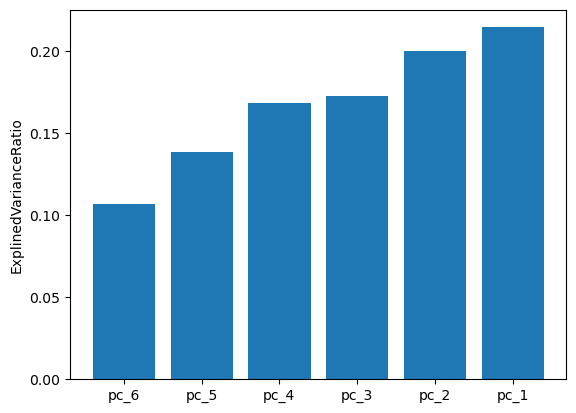

In [23]:
eigens = ob2.eigen
individualExplainedVariance = explained_variance(eigens)
plt.bar(height=individualExplainedVariance,x = ["pc_" + str(6-i) for i in range(6)])
plt.ylabel("ExplinedVarianceRatio")
plt.show()

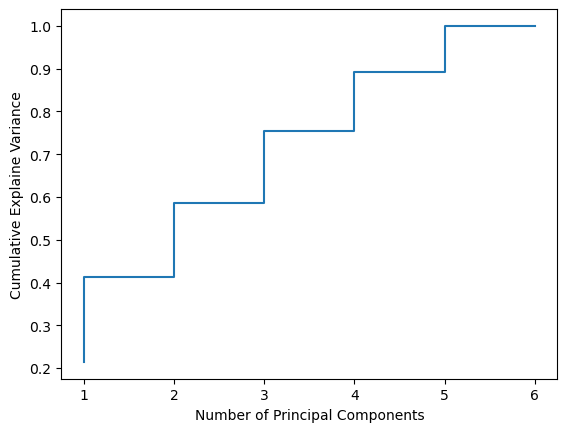

In [24]:
plt.step([i for i in range(1,7)],[cumulativeVariance(individualExplainedVariance,i) for i in range(1,7)])
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explaine Variance")
plt.show()

In [25]:
num_principal_components = 6
ob = PCA(num_principal_components)
new_data = ob.TransformData(np.array(standardized_X))
reduced_standardized_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])

In [28]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
df.columns=["Classes", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline",]
df.head()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
X = df.drop("Classes",axis=1)
y = df["Classes"]
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X.iloc[:,:] = sc.fit_transform(X)


In [30]:
standardized_X = X.copy()
for c in standardized_X.columns:
    standardized_X[c] = (standardized_X[c] - standardized_X[c].mean())/standardized_X[c].std()
pca = PCA(5)
pca_X = pca.TransformData(np.array(standardized_X))
eigen = pca.eigen


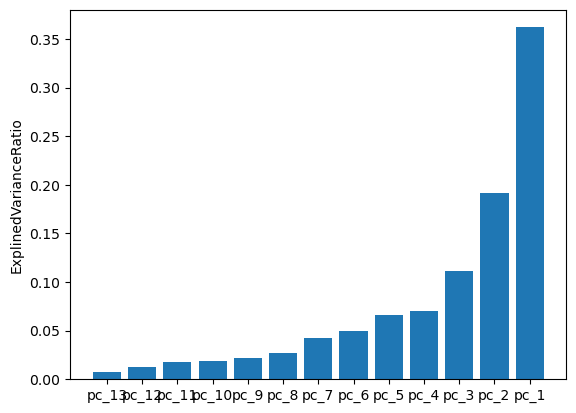

In [31]:

individualExplainedVariance = explained_variance(eigen)
plt.bar(height=individualExplainedVariance,x = ["pc_" + str(13-i) for i in range(13)])
plt.ylabel("ExplinedVarianceRatio")
plt.show()

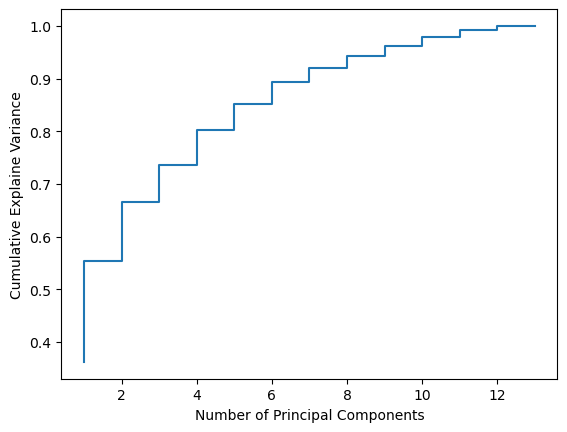

In [32]:
plt.step([i for i in range(1,14)],[cumulativeVariance(individualExplainedVariance,i) for i in range(1,14)])
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explaine Variance")
plt.show()